In [1]:
#imports
import requests 
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting website content
url = 'https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv'
response = requests.get(url)

In [3]:
#parsing using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb "Top 1000"
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
  <meta content="http://www.i

In [4]:
#finding movie details
movie = soup.find_all('div',class_='lister-item mode-advanced')

In [5]:
#extracting and storing movie details in a dictionary
movies_data = []
for container in movie:
    movie_data={}
    name = container.h3.a.text
    movie_data['name'] = name
    year = container.h3.find('span',class_='lister-item-year').text
    movie_data['year'] = year
    runtime = container.p.find('span',class_='runtime').text if container.p.find('span',class_='runtime').text else '-'
    movie_data['runtime'] = runtime
    imdb_rating = float(container.strong.text)
    movie_data['imdb_rating'] = imdb_rating 
    nv = container.find_all('span', attrs={'name': 'nv'}) 
    votes = nv[0].text
    movie_data['votes'] = votes
    movies_data.append(movie_data)

In [6]:
#extracted data
print(movies_data)

[{'name': 'Avatar: The Way of Water', 'year': '(2022)', 'runtime': '192 min', 'imdb_rating': 7.9, 'votes': '243,083'}, {'name': 'The Banshees of Inisherin', 'year': '(2022)', 'runtime': '114 min', 'imdb_rating': 7.8, 'votes': '87,757'}, {'name': 'Puss in Boots: The Last Wish', 'year': '(2022)', 'runtime': '102 min', 'imdb_rating': 7.8, 'votes': '37,778'}, {'name': 'Everything Everywhere All at Once', 'year': '(2022)', 'runtime': '139 min', 'imdb_rating': 8.0, 'votes': '289,177'}, {'name': 'The Fabelmans', 'year': '(2022)', 'runtime': '151 min', 'imdb_rating': 7.7, 'votes': '33,923'}, {'name': 'Knives Out', 'year': '(2019)', 'runtime': '130 min', 'imdb_rating': 7.9, 'votes': '685,679'}, {'name': 'Avatar', 'year': '(2009)', 'runtime': '162 min', 'imdb_rating': 7.9, 'votes': '1,305,593'}, {'name': 'Top Gun: Maverick', 'year': '(2022)', 'runtime': '130 min', 'imdb_rating': 8.3, 'votes': '497,550'}, {'name': "Guillermo del Toro's Pinocchio", 'year': '(2022)', 'runtime': '117 min', 'imdb_rat

In [7]:
#converting dictionary to DataFrame
df = pd.DataFrame.from_dict(movies_data)
df.head()

,name,year,runtime,imdb_rating,votes
0,Avatar: The Way of Water,(2022),192 min,7.9,"243,083"
1,The Banshees of Inisherin,(2022),114 min,7.8,"87,757"
2,Puss in Boots: The Last Wish,(2022),102 min,7.8,"37,778"
3,Everything Everywhere All at Once,(2022),139 min,8.0,"289,177"
4,The Fabelmans,(2022),151 min,7.7,"33,923"


In [8]:
#finding data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         50 non-null     object 
 1   year         50 non-null     object 
 2   runtime      50 non-null     object 
 3   imdb_rating  50 non-null     float64
 4   votes        50 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.1+ KB


In [9]:
#cleaning the year column
df['year'] = df['year'].str.replace(r'[(),I]',"")
print(df['year'])

0      2022
1      2022
2      2022
3      2022
4      2022
5      2019
6      2009
7      2022
8      2022
9      2022
10     2019
11     2022
12     2022
13     1972
14     2001
15     1997
16     1994
17     2014
18     1994
19     2021
20     2013
21     1997
22     2021
23     2008
24     1985
25     2000
26     2013
27     2008
28     1995
29     1999
30     2014
31     2019
32     2010
33     2001
34     2019
35     2017
36     2000
37     1993
38     1981
39     2019
40     2013
41     2009
42     2006
43     2015
44     2015
45     2015
46     2011
47     1994
48     2019
49     1994
Name: year, dtype: object


In [10]:
#cleaning the runtime column
df['runtime'] = df['runtime'].str.replace(r'min',"")
print(df['runtime'])

0     192 
1     114 
2     102 
3     139 
4     151 
5     130 
6     162 
7     130 
8     117 
9     187 
10    161 
11    176 
12    148 
13    175 
14    152 
15    194 
16    142 
17    169 
18    154 
19    155 
20     91 
21    126 
22    148 
23    152 
24    114 
25    102 
26    180 
27    107 
28    170 
29    139 
30    106 
31    181 
32    148 
33    178 
34    113 
35    164 
36    155 
37    127 
38    115 
39    132 
40    153 
41    153 
42    151 
43    120 
44    116 
45    121 
46    100 
47    110 
48    122 
49    142 
Name: runtime, dtype: object


In [11]:
#cleaning votes column
df['votes'] = df['votes'].str.replace(r',',"")
print(df['votes'])

0      243083
1       87757
2       37778
3      289177
4       33923
5      685679
6     1305593
7      497550
8       67881
9      127875
10     745768
11     657733
12     107069
13    1864125
14     786943
15    1182042
16    2687886
17    1841536
18    2062367
19     641146
20     830329
21     977182
22     761168
23    2661267
24     277875
25     628885
26    1418973
27     433442
28     659314
29    2133343
30     868776
31    1137496
32    2360535
33    1881475
34     344640
35     580584
36    1505981
37     993325
38     970600
39     810849
40     722704
41    1456202
42    1330197
43    1007917
44      58394
45     434891
46     647269
47    1166110
48    1295596
49    2086517
Name: votes, dtype: object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         50 non-null     object 
 1   year         50 non-null     object 
 2   runtime      50 non-null     object 
 3   imdb_rating  50 non-null     float64
 4   votes        50 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.1+ KB


In [13]:
#converting object datatypes to integer
df[['year','runtime','votes']] = df[['year','runtime','votes']].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         50 non-null     object 
 1   year         50 non-null     int32  
 2   runtime      50 non-null     int32  
 3   imdb_rating  50 non-null     float64
 4   votes        50 non-null     int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 1.5+ KB


In [15]:
# movies with the highest number of votes
df.sort_values('votes',ascending=False)

,name,year,runtime,imdb_rating,votes
16,The Shawshank Redemption,1994,142,9.3,2687886
23,The Dark Knight,2008,152,9.0,2661267
32,Inception,2010,148,8.8,2360535
29,Fight Club,1999,139,8.8,2133343
49,Forrest Gump,1994,142,8.8,2086517
18,Pulp Fiction,1994,154,8.9,2062367
33,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,1881475
13,The Godfather,1972,175,9.2,1864125
17,Interstellar,2014,169,8.6,1841536
36,Gladiator,2000,155,8.5,1505981


In [16]:
# movies with longest runtime
df.sort_values('runtime',ascending=False)

,name,year,runtime,imdb_rating,votes
15,Titanic,1997,194,7.9,1182042
0,Avatar: The Way of Water,2022,192,7.9,243083
9,RRR (Rise Roar Revolt),2022,187,7.9,127875
31,Avengers: Endgame,2019,181,8.4,1137496
26,The Wolf of Wall Street,2013,180,8.2,1418973
33,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,1881475
11,The Batman,2022,176,7.8,657733
13,The Godfather,1972,175,9.2,1864125
28,Heat,1995,170,8.3,659314
17,Interstellar,2014,169,8.6,1841536


array([[<AxesSubplot:title={'center':'runtime'}>]], dtype=object)

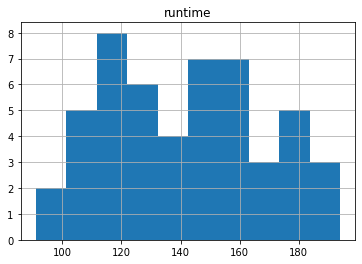

In [17]:
# histogram showing movie runtime
df.hist(column='runtime')

<AxesSubplot:xlabel='year', ylabel='imdb_rating'>

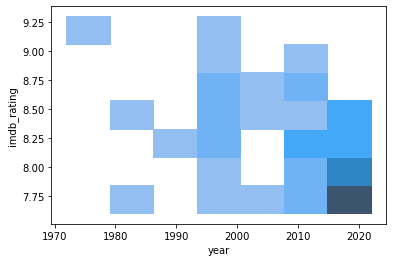

In [18]:
#histogram showing imdb_rating in each decade
import seaborn as sns
sns.histplot(x='year',y='imdb_rating', data=df)

<AxesSubplot:xlabel='year', ylabel='runtime'>

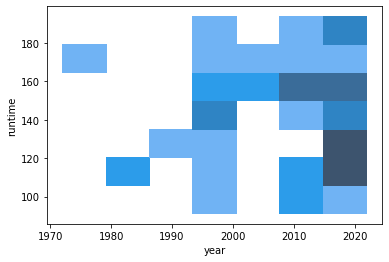

In [19]:
#histogram showing runtime over the decades
sns.histplot(x='year',y='runtime', data=df)